In [1]:
import json
import numpy as np
import os
import supervision as sv
import cv2

In [2]:
os.chdir("..")
HOME = os.getcwd()
DATASET_PATH = os.path.join(HOME, "Data/Weather_Dataset")
print(HOME)
print(DATASET_PATH)

/Users/danielcosta/Berkeley/207/Final_Project
/Users/danielcosta/Berkeley/207/Final_Project/Data/Weather_Dataset


In [3]:
from sklearn.preprocessing import LabelEncoder

classes = os.listdir(DATASET_PATH)
encoder = LabelEncoder()
encoder.fit(classes)
encoded_classes = encoder.transform(classes)
print("Classes:", classes)
print("Encoded Classes:", encoded_classes)

Classes: ['lightning', 'sandstorm', 'glaze', 'rain', 'rime', 'frost', 'fogsmog', 'hail', 'dew', 'rainbow', 'snow']
Encoded Classes: [ 5  9  3  6  8  2  1  4  0  7 10]


In [4]:
RESNET_SHAPE = (224, 224)

In [5]:
def process_image(image_path, shape=RESNET_SHAPE):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, shape)
    return image

In [6]:
def plot_image_and_masks(image_class, image_number):
    
    image_id = f"{image_class}/{image_number}"
    image_path = f"./Data/Weather_Dataset/{image_id}.jpg"
    mask_path = f"./Data/Image_Masks/{image_id}.json"
    segmented_image_path = f"./Data/Segmented_Images/{image_id}.jpg"

    # Load the image
    orig_image = process_image(image_path)
    # Load the segmented image
    segmented_image = process_image(segmented_image_path)
    # Display the image
    sv.plot_image(orig_image)
    sv.plot_image(segmented_image)

    with open(mask_path, "r") as f:
    # Load the JSON data
        data = json.load(f)

    masks = [
    np.array(mask['segmentation'])
    for mask
    in sorted(data['masks'], key=lambda x: x['area'], reverse=True)
    ]
    sv.plot_images_grid(
        images=masks,
        grid_size=(8, int(len(masks) / 8 + 1)),
        size=(16, 16)
    )

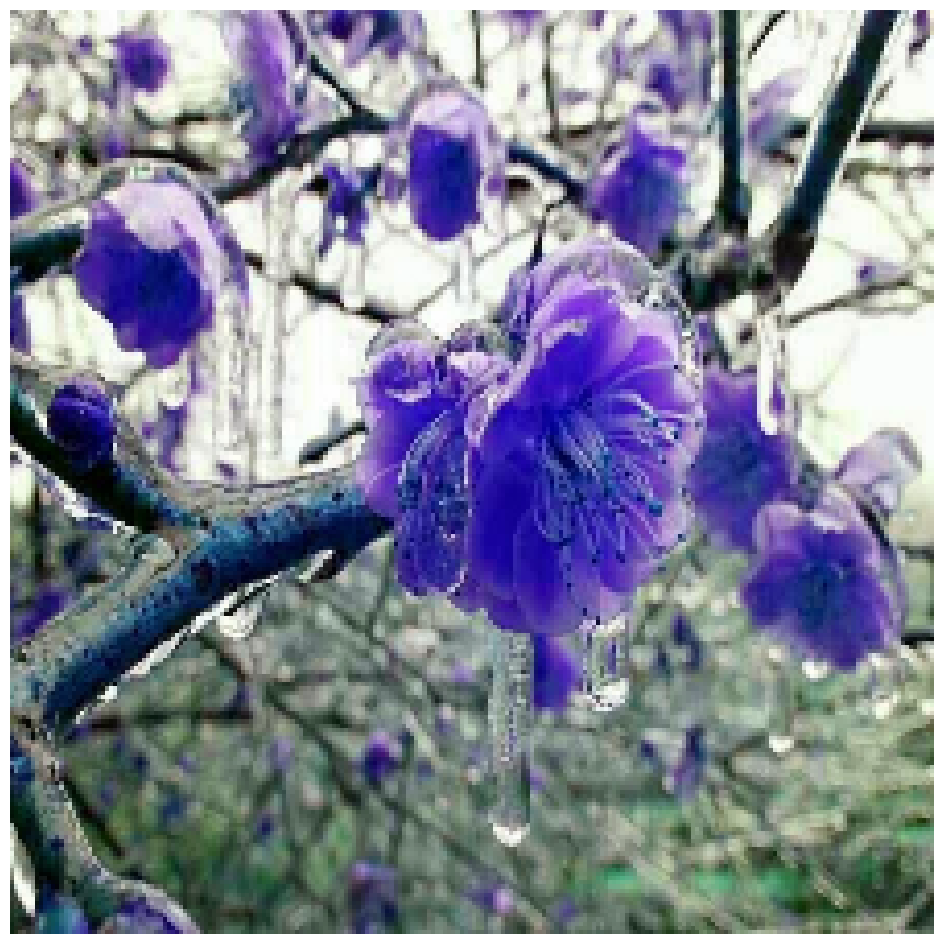

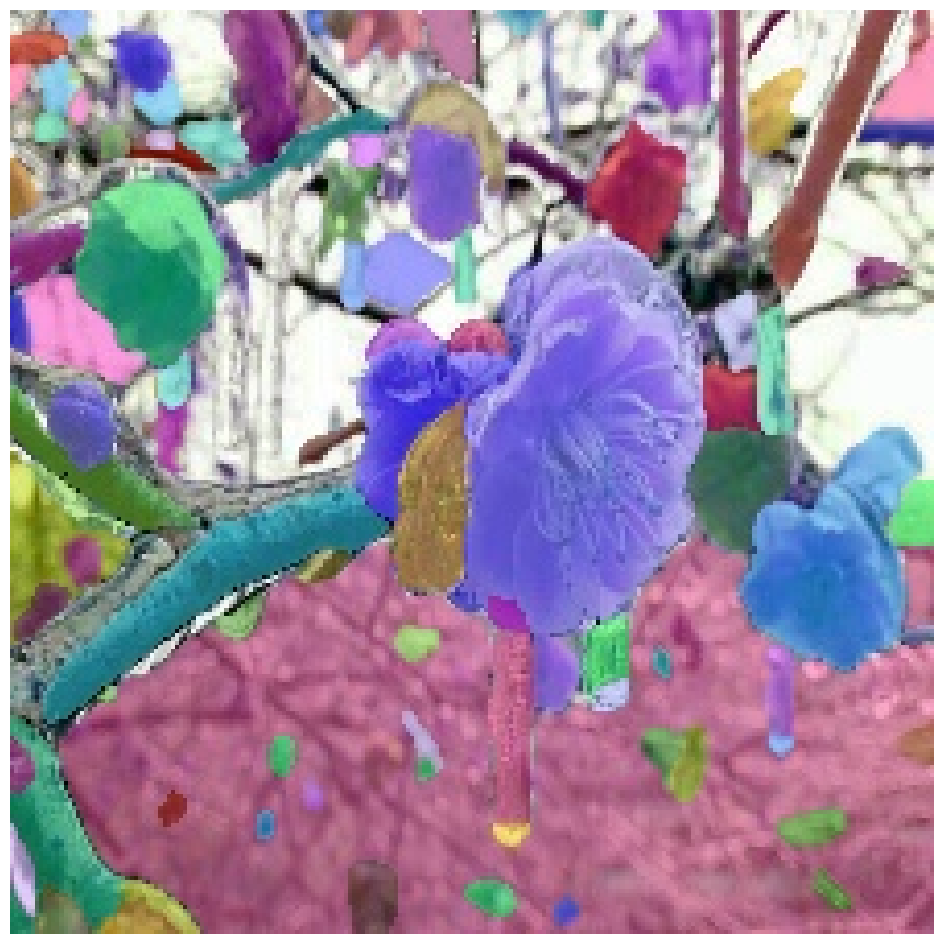

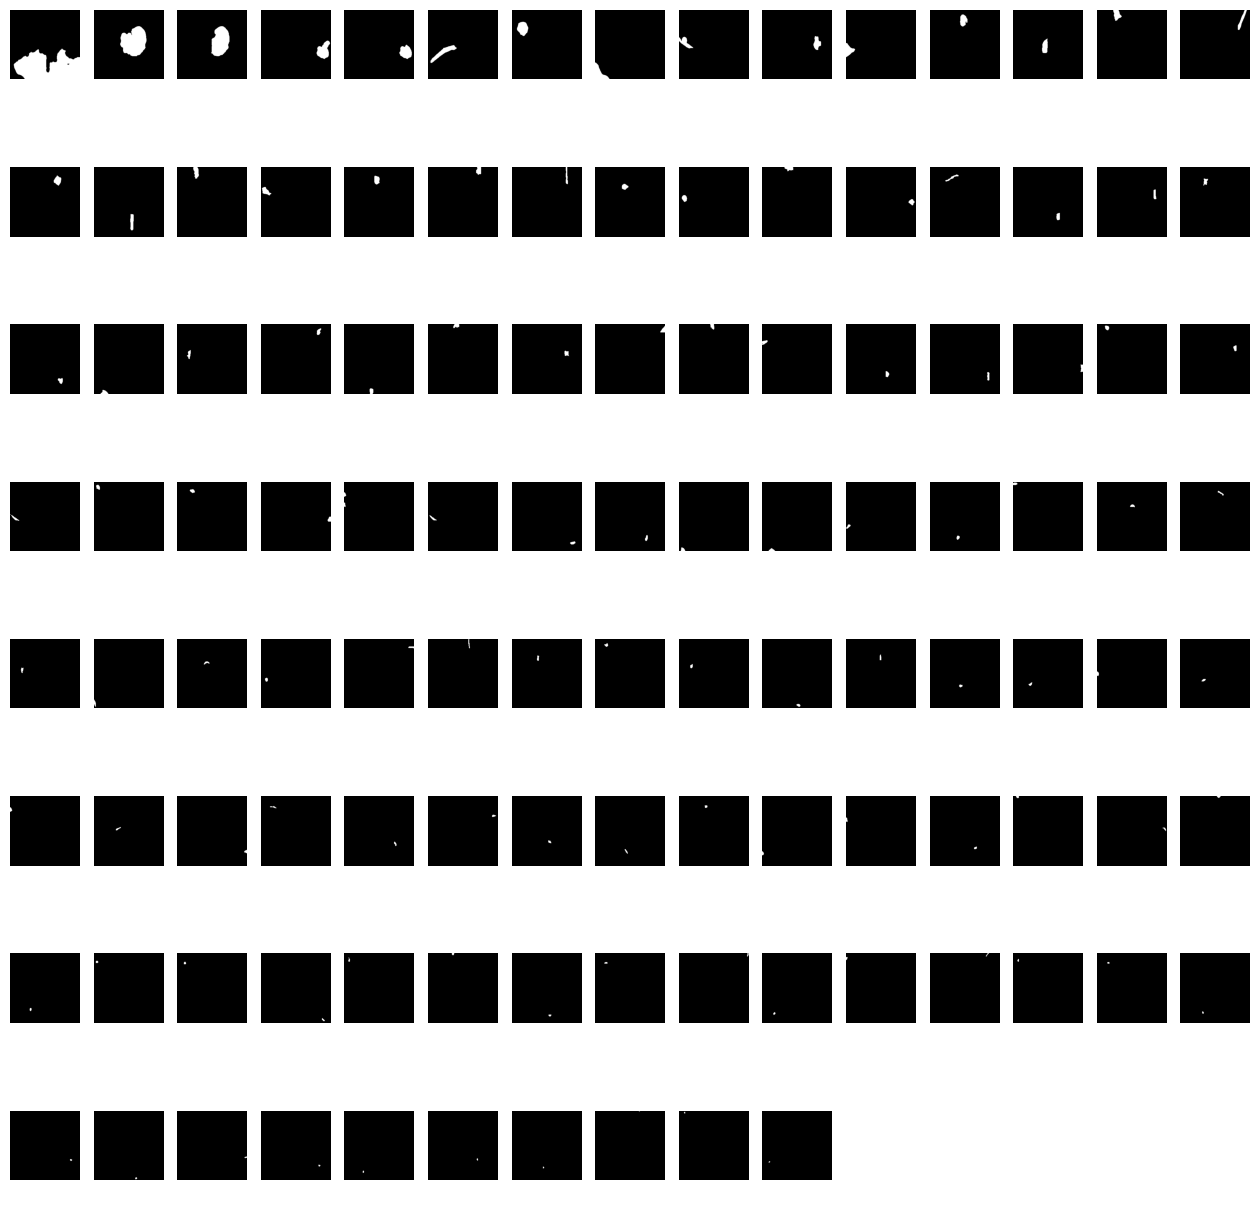

In [8]:
plot_image_and_masks("glaze", "6090")

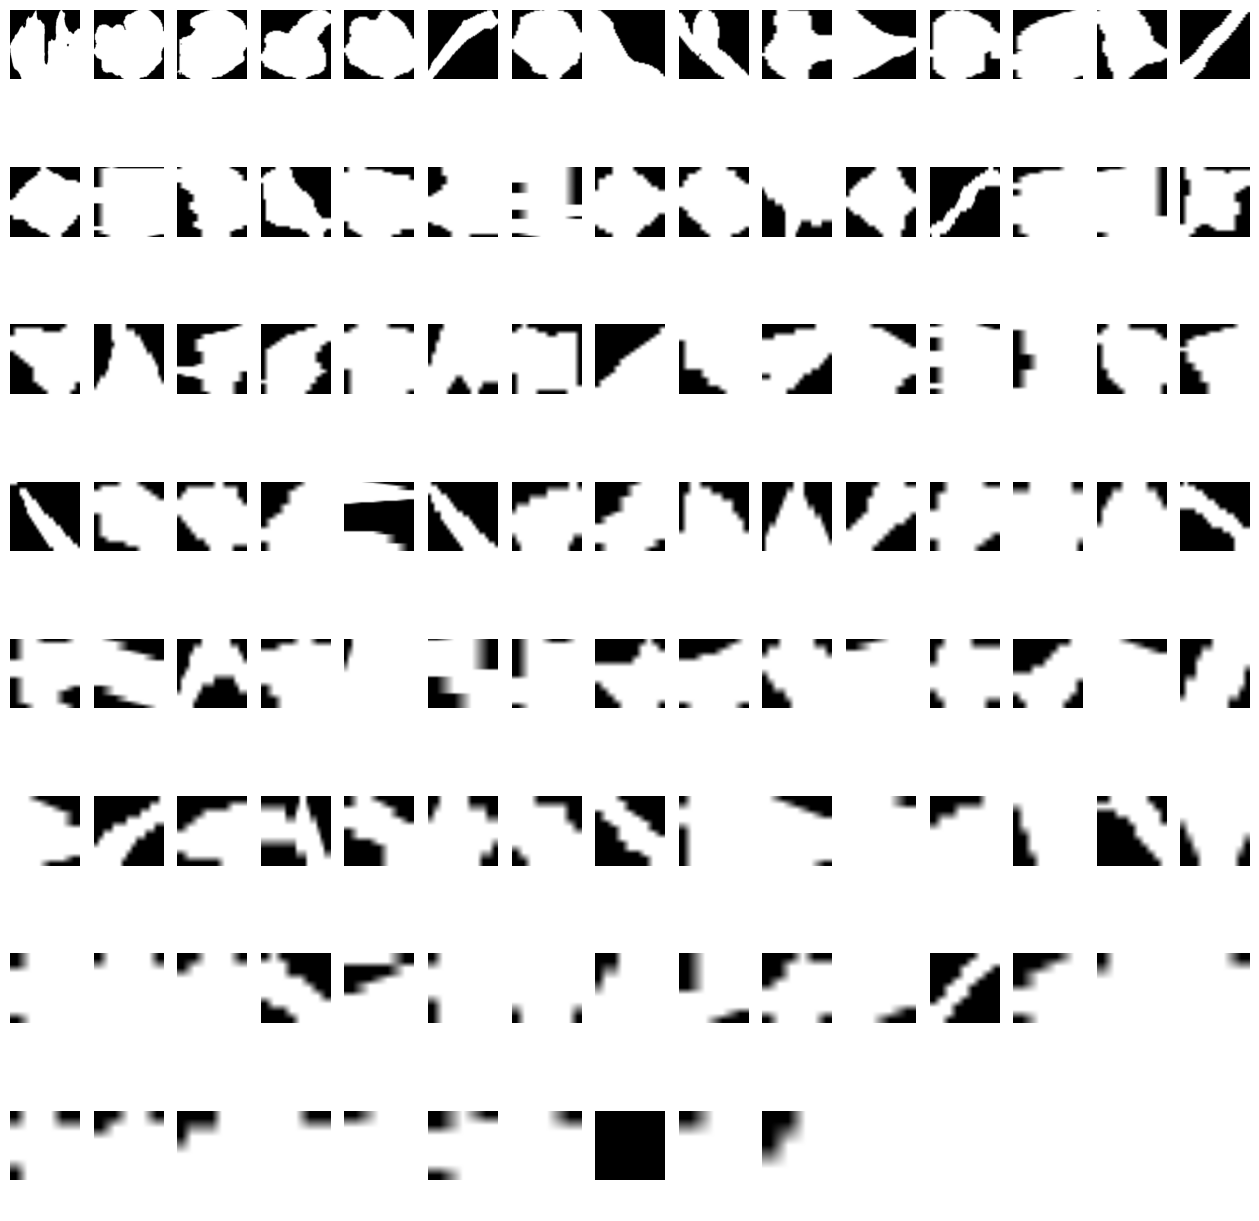

In [7]:
image_class = "glaze"
image_number = "6090"

image_id = f"{image_class}/{image_number}"
image_path = f"./Data/Weather_Dataset/{image_id}.jpg"
mask_path = f"./Data/Image_Masks/{image_id}.json"
segmented_image_path = f"./Data/Segmented_Images/{image_id}.jpg"

with open(mask_path, "r") as f:
    # Load the JSON data
        data = json.load(f)

def crop_and_resize_mask(mask, bbox, shape=RESNET_SHAPE):
    x_min, y_min, width, height = bbox
    cropped_mask = mask[y_min:y_min + height, x_min:x_min + width]
    cropped_mask = (cropped_mask * 255).astype(np.uint8)
    resized_mask = cv2.resize(cropped_mask, shape)
    return resized_mask

def image_from_top_masks(masks, top_n=-1):
    if top_n == -1:
        top_n = len(masks)
    top_masks = masks[:top_n]
    image = np.zeros((RESNET_SHAPE[0], RESNET_SHAPE[1], 3), dtype=np.uint8)
    for mask in top_masks:
        mask = (mask * 255).astype(np.uint8)
        image = cv2.add(image, mask)
    return image

masks = [
np.array(mask['segmentation'])
for mask
in sorted(data['masks'], key=lambda x: x['area'], reverse=True)
]
bboxes = [
    mask['bbox']
    for mask
    in sorted(data['masks'], key=lambda x: x['area'], reverse=True)
]

cropped_masks = [
    crop_and_resize_mask(mask, bbox)
    for mask, bbox
    in zip(masks, bboxes)
]
sv.plot_images_grid(
    images=cropped_masks,
    grid_size=(8, int(len(masks) / 8 + 1)),
    size=(16, 16)
)

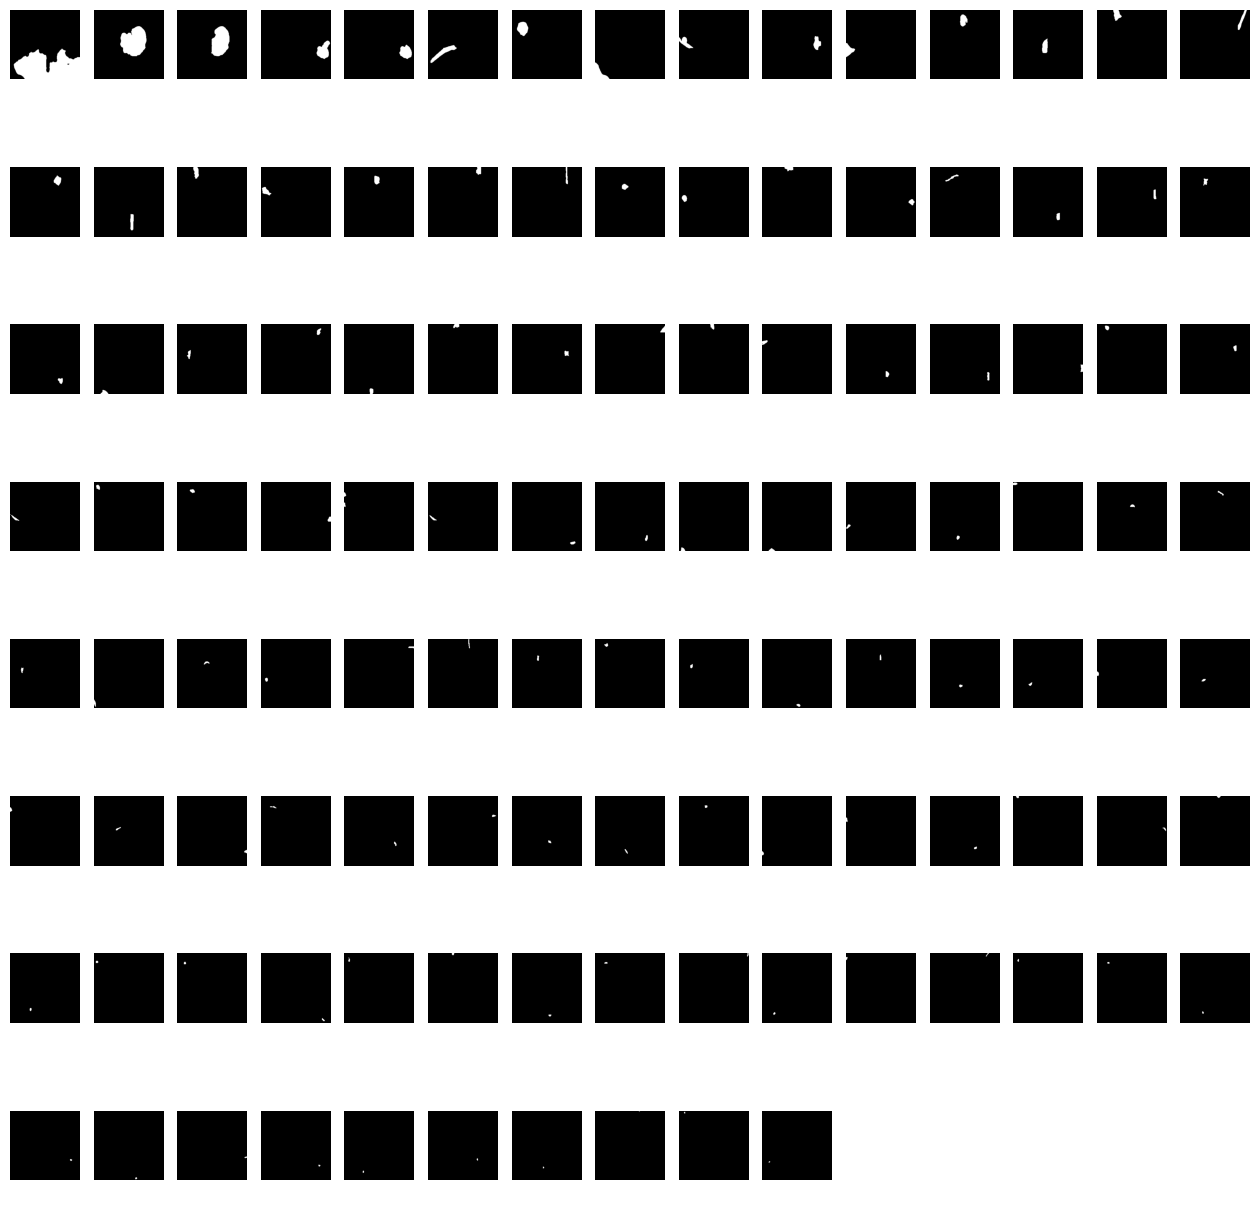

In [8]:
sv.plot_images_grid(
    images=masks,
    grid_size=(8, int(len(masks) / 8 + 1)),
    size=(16, 16)
)

In [9]:
def display_masked_image(image, mask):
    masked_image = image.copy()
    mask = (mask * 255).astype(np.uint8)
    masked_image = cv2.add(masked_image, mask)
    return masked_image

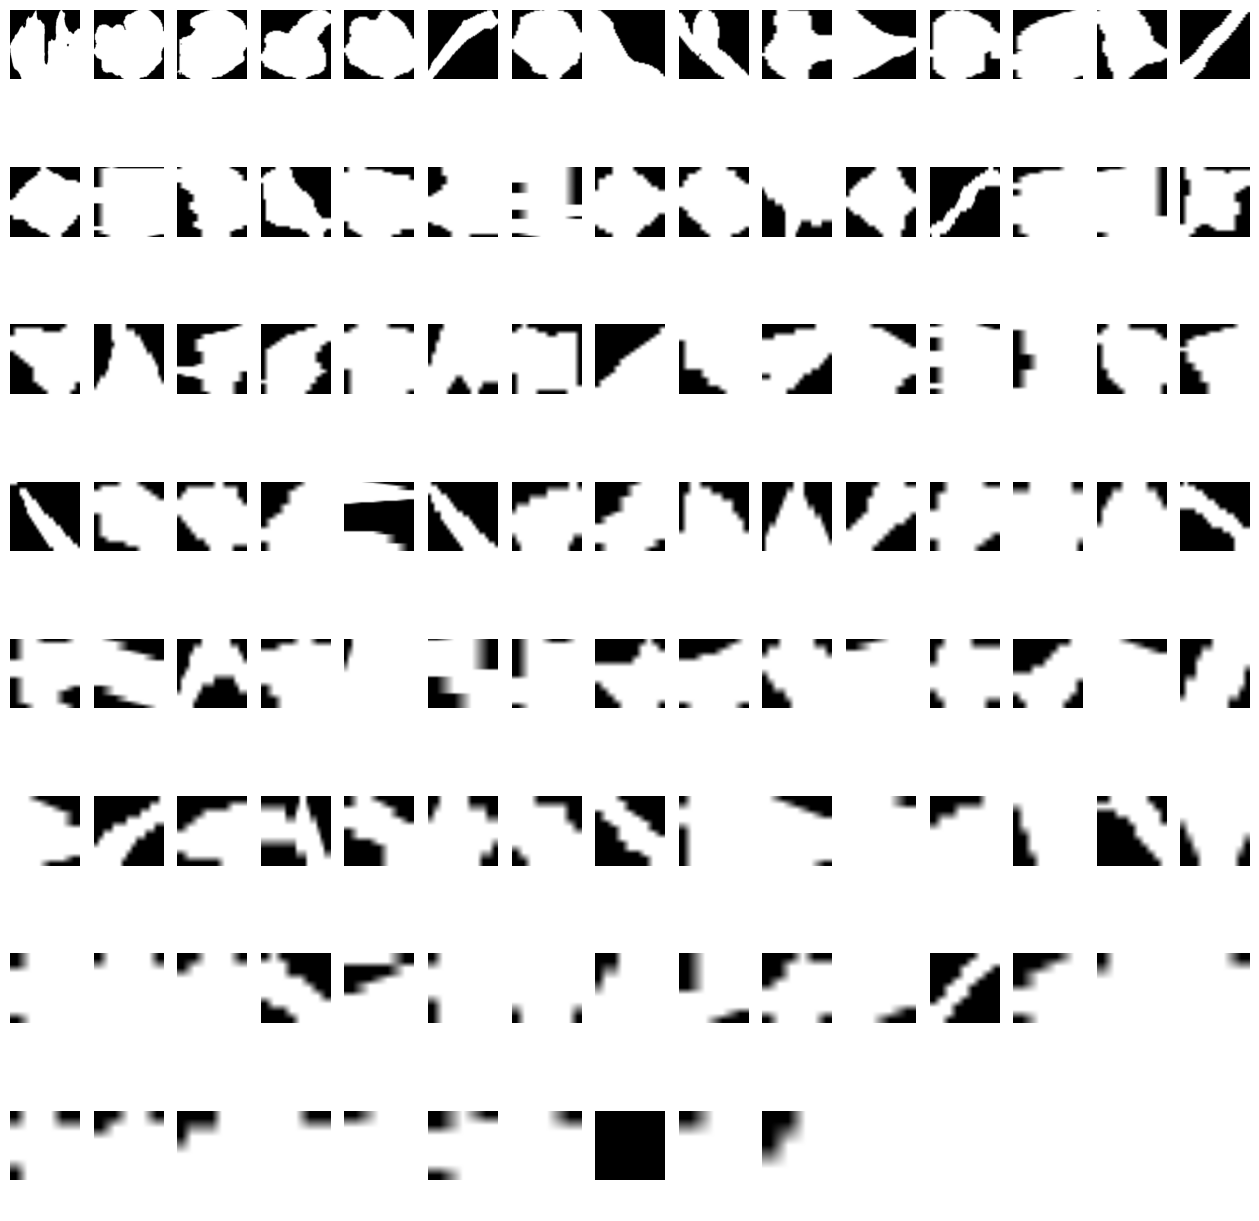

In [10]:
image_class = "glaze"
image_number = "6090"

image_id = f"{image_class}/{image_number}"
image_path = f"./Data/Weather_Dataset/{image_id}.jpg"
mask_path = f"./Data/Image_Masks/{image_id}.json"
segmented_image_path = f"./Data/Segmented_Images/{image_id}.jpg"

with open(mask_path, "r") as f:
    # Load the JSON data
        data = json.load(f)

def crop_and_resize_mask(mask, bbox, shape=RESNET_SHAPE):
    x_min, y_min, width, height = bbox
    cropped_mask = mask[y_min:y_min + height, x_min:x_min + width]
    cropped_mask = (cropped_mask * 255).astype(np.uint8)
    resized_mask = cv2.resize(cropped_mask, shape)
    return resized_mask



masks = [
np.array(mask['segmentation'])
for mask
in sorted(data['masks'], key=lambda x: x['area'], reverse=True)
]
bboxes = [
    mask['bbox']
    for mask
    in sorted(data['masks'], key=lambda x: x['area'], reverse=True)
]

cropped_masks = [
    crop_and_resize_mask(mask, bbox)
    for mask, bbox
    in zip(masks, bboxes)
]
sv.plot_images_grid(
    images=cropped_masks,
    grid_size=(8, int(len(masks) / 8 + 1)),
    size=(16, 16)
)

In [11]:
def image_from_top_masks(image, masks, top_n=-1):
    if top_n == -1:
        top_n = len(masks)
    top_masks = masks[:top_n]
    image = np.zeros((RESNET_SHAPE[0], RESNET_SHAPE[1], 3), dtype=np.uint8)
    for mask in top_masks:
        mask = (mask * 255).astype(np.uint8)
        image = cv2.add(image, mask)
    return image

In [12]:
total_mask = np.zeros((RESNET_SHAPE[0], RESNET_SHAPE[1]), dtype=np.uint8)
top_n = 5
for mask in masks[:top_n]:
    total_mask = total_mask + mask
total_mask = (total_mask > 0).astype(bool)

In [13]:


def get_bounding_box(mask: np.ndarray):
    assert mask.ndim == 2, "Input must be a 2D boolean array"
    
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)

    if not rows.any() or not cols.any():
        return None  # No True values found
    
    row_min, row_max = np.where(rows)[0][[0, -1]]
    col_min, col_max = np.where(cols)[0][[0, -1]]

    # Return as (top, left, bottom, right)
    bbox = [row_min, col_min, row_max - row_min, col_max - col_min]
    return list(map(int, bbox))

In [14]:
def add_masks(masks, top_n=-1):
    if top_n == -1:
        top_n = len(masks)
    total_mask = np.zeros((RESNET_SHAPE[0], RESNET_SHAPE[1]), dtype=np.uint8)
    for mask in masks[:top_n]:
        total_mask = total_mask + mask
    return (total_mask > 0).astype(bool)

In [17]:
mask1 = data['masks'][0]['segmentation']

In [15]:
def crop_and_resize_image(image, bbox, shape=RESNET_SHAPE):
    x_min, y_min, width, height = list(map(int, bbox))
    cropped_image = image[y_min:y_min + height, x_min:x_min + width]
    cropped_image = (cropped_image * 255).astype(np.uint8)
    resized_mask = cv2.resize(cropped_image, shape)
    return resized_mask

def plot_masked_image(image_class, image_number):
    
    image_id = f"{image_class}/{image_number}"
    image_path = f"./Data/Weather_Dataset/{image_id}.jpg"
    mask_path = f"./Data/Image_Masks/{image_id}.json"

    # Load the image
    orig_image = process_image(image_path)
    # Load the segmented image
    # Display the image
    sv.plot_image(orig_image)

    with open(mask_path, "r") as f:
    # Load the JSON data
        data = json.load(f)

    masks = [
    np.array(mask['segmentation'])
    for mask
    in sorted(data['masks'], key=lambda x: x['area'], reverse=True)
    ]

    bboxes = [
        mask['bbox']
        for mask
        in sorted(data['masks'], key=lambda x: x['area'], reverse=True)
    ]

    images = [crop_and_resize_image(np.stack([mask, mask, mask], axis=-1) * orig_image, bbox) for mask, bbox in zip(masks, bboxes)]

    

    sv.plot_images_grid(
        images=images,
        grid_size=(8, int(len(masks) / 8 + 1)),
        size=(16, 16)
    )

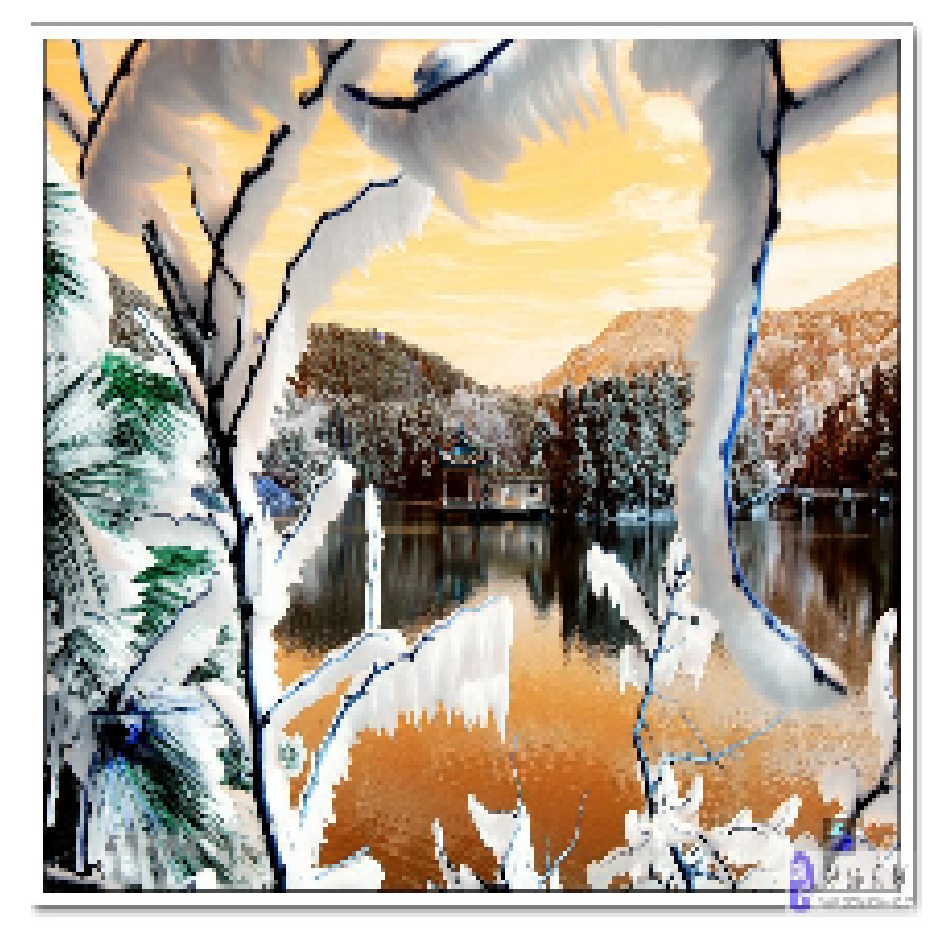

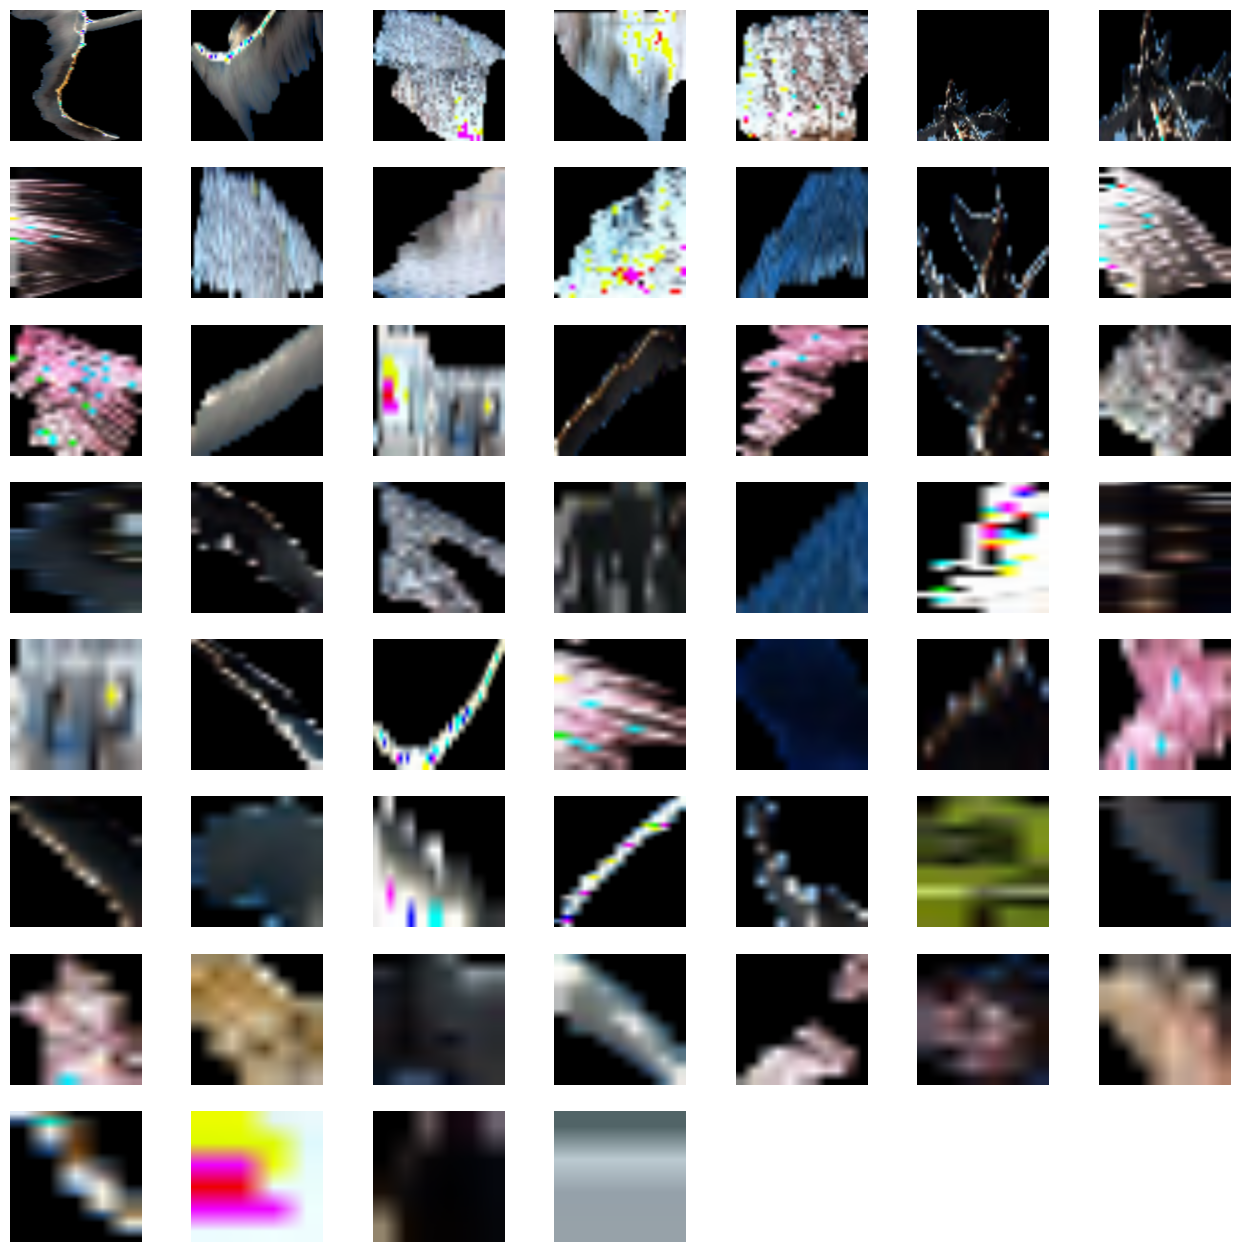

In [19]:
plot_masked_image("glaze", "6725")

In [38]:
def sam_split_image(image_class, image_number, label_encoder, top_n=-1, min_weight=0.002):
    
    image_id = f"{image_class}/{image_number}"
    image_path = f"./Data/Weather_Dataset/{image_id}.jpg"
    mask_path = f"./Data/Image_Masks/{image_id}.json"

    # Load the image
    orig_image = process_image(image_path)

    with open(mask_path, "r") as f:
    # Load the JSON data
        sam_data = json.load(f)

    sorted_sam_data = sorted(sam_data['masks'], key=lambda x: x['area'], reverse=True)

    sorted_sam_data = [
        [
            np.array(mask['segmentation']),
            mask['bbox'],
            mask['area']
        ]
        for mask in sorted_sam_data
        if mask['area'] > 0
        and mask['bbox'][2] > 0
        and mask['bbox'][3] > 0
    ]

    masks, bboxes, areas = zip(*sorted_sam_data)

    images = np.array([
        crop_and_resize_image(
            np.stack([mask, mask, mask], axis=-1) * orig_image,
            bbox
        )
        for mask, bbox in zip(masks, bboxes)
    ])

    if top_n != -1:
        images = images[:top_n]

    n_images = len(images)

    encoded_label = label_encoder.transform([image_class])

    labels = np.full(n_images, encoded_label)

    weights = np.array(list(map(lambda x: x / (RESNET_SHAPE[0] * RESNET_SHAPE[1]), areas)))

    weight_mask = weights > min_weight

    return images[weight_mask], labels[weight_mask], weights[weight_mask]

In [39]:
images_, labels_, weights_ = sam_split_image("lightning", "1958", encoder)

In [43]:
from IPython.display import display, clear_output

sam_dataset_images = []
sam_dataset_labels = []
sam_dataset_weights = []
sam_dataset_orig_images = []
for image_class_ in os.listdir(DATASET_PATH):
    
    for i, image_file_ in enumerate(os.listdir(f"{DATASET_PATH}/{image_class_}")):
        n = len(os.listdir(f'{DATASET_PATH}/{image_class_}'))
        clear_output(wait=True)
        display(f"""Processing class: {image_class_}, image {i + 1} of {n}""")
        
        image_file_split = image_file_.split(".")
        if image_file_split[-1] == "jpg":
            images, labels, weights = sam_split_image(image_class_, image_file_split[0], encoder)
            sam_dataset_images.extend(images)
            sam_dataset_labels.extend(labels)
            sam_dataset_weights.extend(weights)
            sam_dataset_orig_images.extend(np.full(len(labels), f"{image_class_}/{image_file_split[0]}"))

'Processing class: snow, image 579 of 579'

In [ ]:
sam_dataset_images = np.array(sam_dataset_images)
sam_dataset_labels = np.array(sam_dataset_labels)
sam_dataset_weights = np.array(sam_dataset_weights)
sam_dataset_orig_images = np.array(sam_dataset_orig_images)


FileNotFoundError: [Errno 2] No such file or directory: 'Data/SAM_Dataset/sam_dataset_images.npy'

In [53]:
len(sam_dataset_images)

184019

In [51]:
os.makedirs("./Data/SAM_Dataset", exist_ok=True)

In [52]:

np.save("Data/SAM_Dataset/sam_dataset_images.npy", sam_dataset_images)
np.save("Data/SAM_Dataset/sam_dataset_labels.npy", sam_dataset_labels)
np.save("Data/SAM_Dataset/sam_dataset_weights.npy", sam_dataset_weights)
np.save("Data/SAM_Dataset/sam_dataset_orig_images.npy", sam_dataset_orig_images)

In [60]:
from sklearn.model_selection import train_test_split

# Train the model on the different SAM images

indices = np.arange(len(sam_dataset_images))

X_train, X_temp, y_train, y_temp, indices_train, indices_temp = train_test_split(
    sam_dataset_images,
    sam_dataset_labels,
    indices,
    test_size=0.4,
    shuffle=True,
    stratify=sam_dataset_labels,
    random_state=1234
)

In [61]:
X_val, X_test, y_val, y_test, indices_val, indices_test = train_test_split(
    X_temp,
    y_temp,
    indices_temp,
    test_size=0.5,
    random_state=1234,
    shuffle=True,
    stratify=y_temp
)

In [65]:
# Get weights for each class and individual image

labels, label_counts = np.unique(y_train, return_counts=True)
n_train = len(y_train)
# class_weights = label_counts / n_train
training_weights = np.array(sam_dataset_weights[idx] for idx in indices_train)]
training_weights = training_weights / np.mean(training_weights)

In [93]:
label_counts

array([10446, 12743, 12326, 12349, 18024,  2167, 11798,  1625,  9656,
        7743, 11534])

: 

In [66]:
# now actually train the model
import tensorflow as tf

np.float64(1.0)

In [72]:
import tensorflow as tf
import keras_tuner as kt
import pathlib
import matplotlib.pyplot as plt

num_classes = len(labels)

# Define the model-building function for Keras Tuner
def build_model():
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.InputLayer(shape=RESNET_SHAPE + (3,)),
        
        # First convolutional block
        tf.keras.layers.Conv2D(
            filters=32,
            kernel_size=3,
            activation="relu",
            padding="same"
        ),
        tf.keras.layers.MaxPooling2D(),
        
        # Second convolutional block
        tf.keras.layers.Conv2D(
            filters=32,
            kernel_size=3,
            activation="relu",
            padding="same"
        ),
        tf.keras.layers.MaxPooling2D(),
        
        # Flatten and Dense layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(num_classes, activation="softmax")
    ])

    # Compile the model using a tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            1e-3
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Set up the Keras Tuner with Hyperband search
model = build_model()

# Optional: early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

# Run the hyperparameter search


In [87]:
train_sample_indices = np.random.choice(len(X_train), size=2000, replace=False)
val_sample_indices = np.random.choice(len(X_val), size=400, replace=False)

X_train_small = X_train[train_sample_indices]
y_train_small = y_train[train_sample_indices]
X_val_small = X_val[val_sample_indices]
y_val_small = y_val[val_sample_indices]

training_weights_small = training_weights[train_sample_indices]

In [88]:
history = model.fit(
    X_train_small,
    y_train_small,
    sample_weight=training_weights_small,
    validation_data=(X_val_small, y_val_small),
    epochs=20,
    batch_size=64,
    callbacks=[stop_early],
    verbose=1,
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.1702 - loss: 9.7661 - val_accuracy: 0.1625 - val_loss: 2.3122
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.2074 - loss: 1.3713 - val_accuracy: 0.1575 - val_loss: 2.3997
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.2515 - loss: 0.8896 - val_accuracy: 0.1700 - val_loss: 2.5667
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.2821 - loss: 0.6611 - val_accuracy: 0.1800 - val_loss: 2.6234
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.3371 - loss: 0.6399 - val_accuracy: 0.1675 - val_loss: 2.8052
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.3583 - loss: 0.3904 - val_accuracy: 0.1650 - val_loss: 2.9129
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.3737 - loss: 0.4327 - val_accuracy: 0.1600 - val_loss: 3.2331
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.4117 - loss: 0.3308 - val_accuracy: 0.

np.float64(0.7472625010189202)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    sample_weight=training_weights,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[stop_early],
    verbose=1
)

### EDA on Image Data

In [ ]:
def get_random_image_ids(class_name, orig_images, n=5):
    sam_dataset_orig_images = np.load("../Data/SAM_Dataset/sam_dataset_orig_images.npy")
    pass

#### Glaze

In [ ]:
plot_image_and_masks("glaze", "6090")

#### Dew

#### Fogsmog

#### Frost

#### Hail

#### Lightning

#### Rain

#### Rainbow

#### Rime

#### Sandstorm

#### Snow